In [0]:
from google.colab import drive
drive.mount('/content/dataset')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/dataset


In [0]:
%tensorflow_version 1.x
import numpy as np
import tensorflow as tf


DATASET_PATH = '/content/dataset/My Drive/two/train'
test_dir = '/content/dataset/My Drive/two/test'
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 10
NUM_EPOCHS = 20
LEARNING_RATE =0.0005 


TensorFlow 1.x selected.


In [0]:

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

#Train datagen here is a preprocessor

train_datagen = ImageDataGenerator(rescale=1./255,
rotation_range=50,
featurewise_center = True,
featurewise_std_normalization = True,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.25,
zoom_range=0.1,
zca_whitening = True,
channel_shift_range = 20,
horizontal_flip = True ,
vertical_flip = True ,
validation_split = 0.2,
fill_mode='constant')
#augmentation qualités des images .

train_batches = train_datagen.flow_from_directory(DATASET_PATH,
target_size=IMAGE_SIZE,
shuffle=True,
batch_size=BATCH_SIZE,
subset = "training",
seed=42,
class_mode="binary",#on a deux classe
 
)#train les images aprés modifiation

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
target_size=IMAGE_SIZE,
shuffle=True,
batch_size=BATCH_SIZE,
subset = "validation",
seed=42,
class_mode="binary",
)#validation

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [0]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
#pre-trained model VGG16 convenable avec max size image 224*224
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))#input_shape est la taille en pixels des images et la profondeur de l'image
conv_base.trainable = False
conv_base.summary()
'''for layer in conv_base.layers:
  print(layer.name, layer.trainable)'''

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

'for layer in conv_base.layers:\n  print(layer.name, layer.trainable)'

In [0]:

model = models.Sequential() #modele sequentiel
model.add(conv_base)#couche d'entrée
model.add(layers.Flatten())#couche  de liason entre conv_base et dense/couche caché
model.add(layers.Dense(256, activation='relu'))#256 noeuds/couch caché
model.add(layers.Dense(1, activation='sigmoid'))#couche de sortie nous avons une seule noeud de sortie
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.Adam(lr=LEARNING_RATE),
metrics=['acc'])#mise à jour des poids
model.summary()

#4 couches


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
#Fitting/Training the model
#Calculate how many batches are needed to go through whole train and validation set
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
result=model.fit_generator(train_batches,
steps_per_epoch =STEP_SIZE_TRAIN,
validation_data = valid_batches,
validation_steps = STEP_SIZE_VALID,
epochs= NUM_EPOCHS,#nombres de repetition training 20 notre cas
)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 4s 369ms/step - loss: 0.5405 - acc: 0.7047 - val_loss: 0.3842 - val_acc: 0.7500
Epoch 2/20
10/10 [==============================] - 3s 321ms/step - loss: 0.5292 - acc: 0.7787 - val_loss: 0.5386 - val_acc: 0.8125
Epoch 3/20
10/10 [==============================] - 3s 320ms/step - loss: 0.3334 - acc: 0.8700 - val_loss: 0.2178 - val_acc: 0.9375
Epoch 4/20
10/10 [==============================] - 3s 334ms/step - loss: 0.3141 - acc: 0.8556 - val_loss: 0.2450 - val_acc: 0.9000
Epoch 5/20
10/10 [==============================] - 4s 361ms/step - loss: 0.2369 - acc: 0.9195 - val_loss: 0.2733 - val_acc: 0.9375
Epoch 6/20
10/10 [==============================] - 3s 280ms/step - loss: 0.1387 - acc: 0.9698 - val_loss: 0.0882 - val_acc: 1.0000
Epoch 7/20
10/10 [==============================] - 3s 350ms/step - loss: 0.2173 - acc: 0.8952 - val_loss: 0.1023 - val_acc: 0.9500
Epoch 8/20
10/10 [==============================] - 3s 341ms/step - loss: 0.1349 - acc:

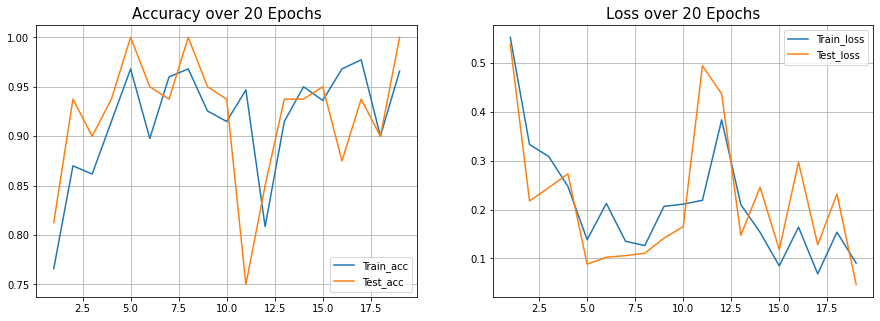

In [0]:
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
 acc = result.history['acc']
 loss = result.history['loss']
 val_acc = result.history['val_acc']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(result, 20)

In [0]:
#Pour confirmer nos résultats, nous testerons notre modèle sur 9 imagages test dataset
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(
test_dir,target_size=IMAGE_SIZE,
batch_size=1,
shuffle=False,
seed=42,
  
class_mode="binary")

#Evaluate the model

eval_generator.reset()
x = model.evaluate_generator(eval_generator,
steps = np.ceil(len(eval_generator) / BATCH_SIZE),
use_multiprocessing = False,
verbose = 1,
workers=1
)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 18 images belonging to 2 classes.
2/2 [==============================] - 0s 53ms/step
Test loss: 0.052792522590607405
Test accuracy: 1.0


1000/1000 [==============================] - 41s 41ms/step
Predictions finished
covid/nejmoa2001191_f3-PA.jpeg


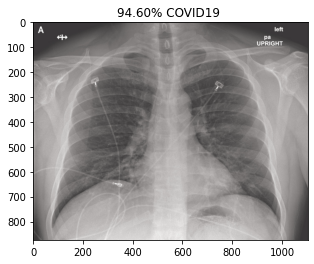

covid/nejmoa2001191_f4.jpeg


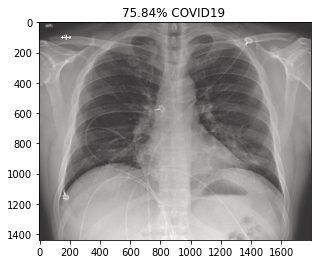

covid/nejmoa2001191_f5-PA.jpeg


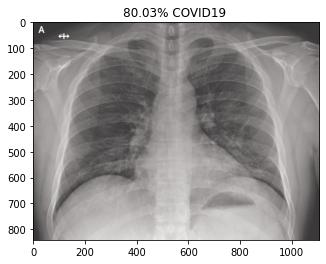

covid/radiol.2020200490.fig3.jpeg


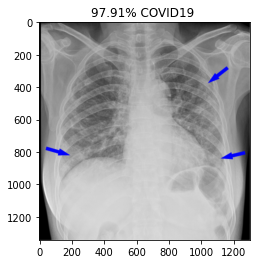

covid/ryct.2020200028.fig1a.jpeg


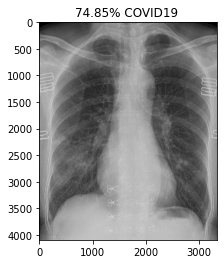

covid/ryct.2020200034.fig2.jpeg


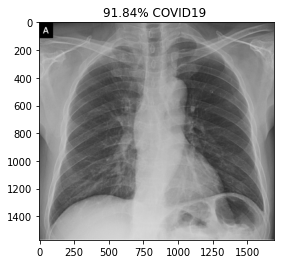

covid/ryct.2020200034.fig5-day0.jpeg


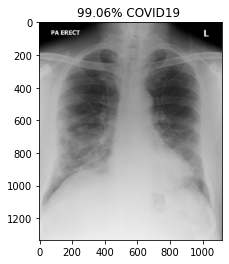

covid/ryct.2020200034.fig5-day4.jpeg


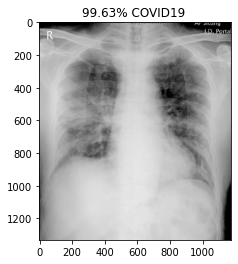

covid/ryct.2020200034.fig5-day7.jpeg


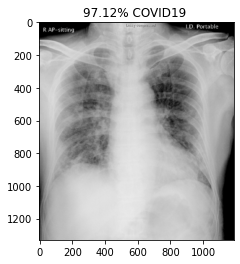

normal/NORMAL2-IM-1385-0001.jpeg


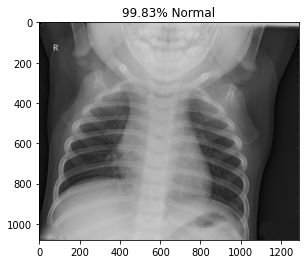

normal/NORMAL2-IM-1396-0001.jpeg


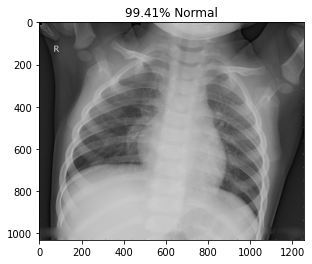

normal/NORMAL2-IM-1400-0001.jpeg


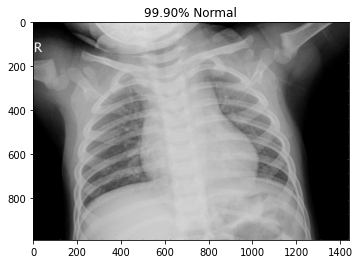

normal/NORMAL2-IM-1401-0001.jpeg


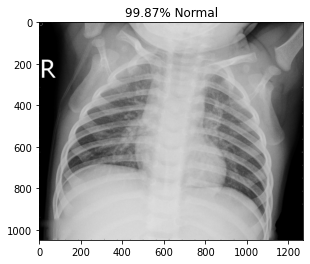

normal/NORMAL2-IM-1406-0001.jpeg


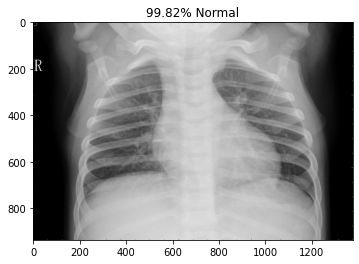

normal/NORMAL2-IM-1412-0001.jpeg


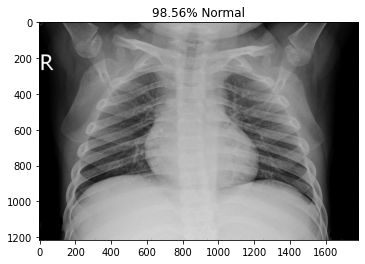

normal/NORMAL2-IM-1419-0001.jpeg


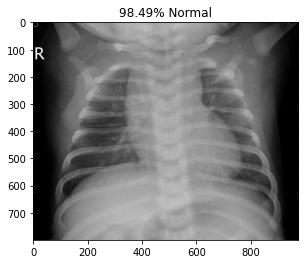

normal/NORMAL2-IM-1422-0001.jpeg


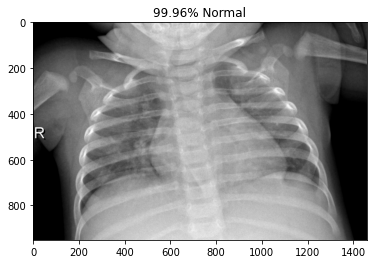

normal/NORMAL2-IM-1423-0001.jpeg


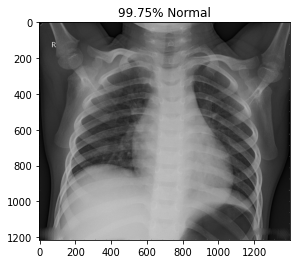

IndexError: ignored

In [0]:
#Predict the output
eval_generator.reset() 
pred = model.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
  image_path = test_dir + "/" +eval_generator.filenames[index]
  image = mpimg.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  pixels = np.array(image)
  plt.imshow(pixels)
  print(eval_generator.filenames[index])
  if probability > 0.5:
    plt.title("%.2f" % (probability[0]*100) + "% Normal")
  else:
    plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 ")
  plt.show()